In [1]:
import pandas as pd
import numpy as np
import glob
import json
# from Bio import SeqIO, pairwise2
# from Bio.PDB.PDBParser import PDBParser
# from Bio.SubsMat import MatrixInfo as matlist
import re
from tqdm import tqdm

import warnings
warnings.filterwarnings('ignore')

In [2]:
amino_acids_3l_key = {"ARG":"R", "HIS":"H", "LYS":"K", "ASP":"D", "GLU":"E", "SER":"S", "THR":"T", "ASN":"N", "GLN": "Q", "CYS":"C", "SEC": "U","GLY":"G","PRO": "P", "ALA":"A","VAL":"V","ILE":"I", "LEU": "L", "MET":"M", "MSE": "M", "PHE": "F", "TYR": "Y", "TRP":"W"}
amino_acids_1l_key = {'R': 'ARG', 'H': 'HIS', 'K': 'LYS', 'D': 'ASP', 'E': 'GLU', 'S': 'SER', 'T': 'THR', 'N': 'ASN', 'Q': 'GLN', 'C': 'CYS', 'U': 'SEC', 'G': 'GLY', 'P': 'PRO', 'A': 'ALA', 'V': 'VAL', 'I': 'ILE', 'L': 'LEU', 'M': 'MET', 'F': 'PHE', 'Y': 'TYR', 'W': 'TRP'}

### Prepare dataset

In [2]:
df_s1 = pd.read_csv("./Datasets/Dataset_Reuter/s1.csv")
df_s2 = pd.read_csv("./Datasets/Dataset_Reuter/S2 File.csv") # all info is included in df_reuter -> 1328 structures

In [3]:
df_reuter = pd.read_csv('./Datasets/Dataset_Reuter/PePr2DS.csv')
df_reuter

,domain,cathpdb,pdb,uniprot_acc,uniprot_id,residue_name,IBS,chain_id,residue_number,b_factor,...,S35,S60,S95,S100,uniref50,uniref90,uniref100,origin,location,taxon
0,PH,2m14A00,2M14,P32776,TFB1_YEAST,ASN,False,A,19,0.00,...,123,123.1,123.1.1,123.1.1.1,P32776,P32776,P32776,YEAST,['Nucleus'],Eukaryota/Fungi
1,PH,2m14A00,2M14,P32776,TFB1_YEAST,ASN,False,A,75,0.00,...,123,123.1,123.1.1,123.1.1.1,P32776,P32776,P32776,YEAST,['Nucleus'],Eukaryota/Fungi
2,PH,2m14A00,2M14,P32776,TFB1_YEAST,ASN,False,A,78,0.00,...,123,123.1,123.1.1,123.1.1.1,P32776,P32776,P32776,YEAST,['Nucleus'],Eukaryota/Fungi
3,PH,2m14A00,2M14,P32776,TFB1_YEAST,ASN,False,A,92,0.00,...,123,123.1,123.1.1,123.1.1.1,P32776,P32776,P32776,YEAST,['Nucleus'],Eukaryota/Fungi
4,PH,2m14A00,2M14,P32776,TFB1_YEAST,ASN,False,A,93,0.00,...,123,123.1,123.1.1,123.1.1.1,P32776,P32776,P32776,YEAST,['Nucleus'],Eukaryota/Fungi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
562250,PLA,5p2pB00,5P2P,P00592,PA21B_PIG,CYS,False,B,91,17.26,...,2,2.1,2.1.2,2.1.2.4,P04054,P00592,P00592,PIG,['Secreted'],Eukaryota/Metazoa
562251,PLA,5p2pB00,5P2P,P00592,PA21B_PIG,CYS,False,B,96,15.41,...,2,2.1,2.1.2,2.1.2.4,P04054,P00592,P00592,PIG,['Secreted'],Eukaryota/Metazoa
562252,PLA,5p2pB00,5P2P,P00592,PA21B_PIG,CYS,False,B,98,11.96,...,2,2.1,2.1.2,2.1.2.4,P04054,P00592,P00592,PIG,['Secreted'],Eukaryota/Metazoa
562253,PLA,5p2pB00,5P2P,P00592,PA21B_PIG,CYS,False,B,105,17.27,...,2,2.1,2.1.2,2.1.2.4,P04054,P00592,P00592,PIG,['Secreted'],Eukaryota/Metazoa


In [4]:
df_reuter_ibs = df_reuter[df_reuter['IBS'] == True]
del df_reuter
# df_reuter_non_ibs = df_reuter[df_reuter['IBS'] == False]

### Show some general info's that denoted in the paper

Text(0.5, 1.0, 'Percentage of SS in IBS dataset')

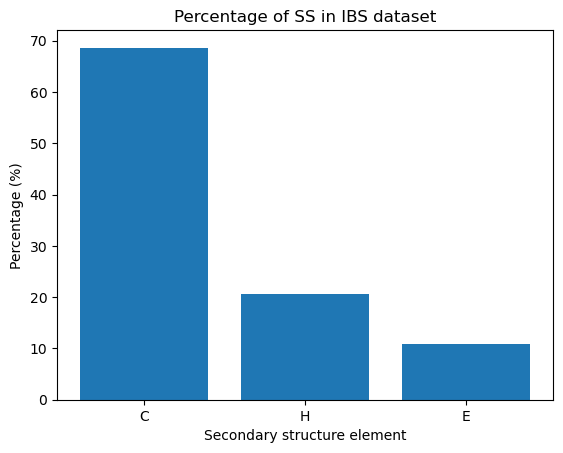

In [9]:
import matplotlib.pyplot as plt
# (df_reuter_ibs['sec_struc'].value_counts(normalize=True) * 100).index
plt.bar( (df_reuter_ibs['sec_struc'].value_counts(normalize=True) * 100).index, (df_reuter_ibs['sec_struc'].value_counts(normalize=True) * 100).values)
plt.xlabel("Secondary structure element")
plt.ylabel("Percentage (%)")
plt.title("Percentage of SS in IBS dataset")
# More proteins from C2DIS family

In [89]:
df_reuter_non_ibs['sec_struc'].value_counts(normalize=True) * 100

C    41.266285
E    35.638536
H    23.095179
Name: sec_struc, dtype: float64

Text(0.5, 1.0, 'Percentage of AA in IBS dataset')

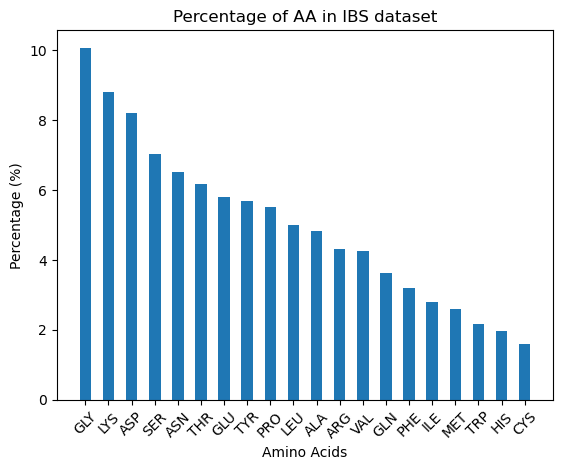

In [17]:
plt.bar( (df_reuter_ibs['residue_name'].value_counts(normalize=True) * 100).index, (df_reuter_ibs['residue_name'].value_counts(normalize=True) * 100).values, width=0.5)
plt.xlabel("Amino Acids")
plt.xticks(rotation=45)
plt.ylabel("Percentage (%)")
plt.title("Percentage of AA in IBS dataset")

In [93]:
df_reuter_ibs[df_reuter_ibs['protrusion'] == True].residue_name.value_counts(normalize=True) * 100

LYS    12.723366
ASP    10.273948
SER     8.755595
ASN     8.451209
GLU     7.971352
PRO     7.584602
THR     7.581021
ALA     6.112802
LEU     5.059982
VAL     4.673232
ARG     4.118174
GLN     3.136974
TYR     2.904208
PHE     2.897046
ILE     2.381379
HIS     1.958818
MET     1.761862
TRP     1.475380
CYS     0.179051
Name: residue_name, dtype: float64

In [100]:
df_reuter_ibs[df_reuter_ibs['domain'] == 'PH'].residue_name.value_counts(normalize=True) * 100

LYS    15.190093
GLU     9.578245
GLY     8.400450
ASP     7.724950
SER     7.127392
ARG     6.677059
LEU     5.473283
THR     5.230796
PRO     4.763142
GLN     4.563956
ASN     4.468693
VAL     3.836494
ALA     3.758552
ILE     2.953148
PHE     2.286308
TYR     2.173725
TRP     2.165065
HIS     2.000520
MET     1.125834
CYS     0.502295
Name: residue_name, dtype: float64

### Check similarities in files

In [15]:
# Proteins that don't have IBS amino_acids
set(df_reuter_non_ibs.pdb.unique()).difference(df_reuter_ibs.pdb.unique())

{'1p8jB02', '2id4A02', '3d3aA02', '3w5mA04', '4e8cB02', '4madA02', '4omdB02'}

In [72]:
print("Common proteins between the 2 datasets %s " % len(set(df_reuter_non_ibs.pdb.unique()) & set(df_reuter_ibs.pdb.unique())))
print("Unique pdbs in non_ibs df " + str(len(df_reuter_non_ibs.pdb.unique())))
print("Unique cathpdb in non_ibs df " + str(len(df_reuter_non_ibs.cathpdb.unique())))
print("Unique pdbs in ibs df " + str(len(df_reuter_ibs.pdb.unique())))
print("Unique cathpdb in ibs df " + str(len(df_reuter_ibs.cathpdb.unique())))

Common proteins between the 2 datasets 1950 
Unique pdbs in non_ibs df 1963
Unique cathpdb in non_ibs df 3980
Unique pdbs in ibs df 1950
Unique cathpdb in ibs df 3936


### Explore DREAMM's Dataset

In [8]:
# Get the files with extension .pdb that exist in the current folder
dreamm_files_name = glob.glob("./Datasets/Dataset_DREAMM/*/*.pdb")
dreamm_files_name = [x[-8:-4].upper() for x in dreamm_files_name]
print("Unique proteins %s" % len(dreamm_files_name))
print(dreamm_files_name)

Unique proteins 65
['5HXW', '6BFG', '4OVU', '3JW8', '1TQN', '3AKM', '3W7R', '1LN1', '1COY', '3NPE', '5BZZ', '1TBN', '1GMI', '1CZS', '2MH1', '3UEJ', '2P0M', '1EAZ', '1H0A', '4HG9', '1VAP', '2K45', '1NL1', '1LA4', '1CJY', '4DNL', '2E73', '1DVP', '1C1Z', '1OIZ', '1FAO', '1HN4', '1VFY', '2AYL', '1KQ6', '2R7E', '5F0P', '1H6H', '2PTD', '4X08', '1JOC', '3IIQ', '1ES6', '4V11', '1PFO', '1FAQ', '1GYG', '1DK5', '1IAZ', '1GWY', '1SDD', '2KS4', '1POA', '1ANX', '2FNQ', '1POC', '5G3N', '1FFJ', '3RZN', '3FSN', '1JSS', '1S6X', '2DDR', '2RSG', '2A1L']


In [6]:
print("Common proteins between the 2 datasets %s " % len(set(dreamm_files_name) & set(df_reuter_ibs.pdb.unique())))
print(set(dreamm_files_name) & set(df_reuter_ibs.pdb.unique()))
common_proteins = list(set(dreamm_files_name) & set(df_reuter_ibs.pdb.unique()))

Common proteins between the 2 datasets 30 
{'1CJY', '5G3N', '1ANX', '1VAP', '4HG9', '1TBN', '1FAQ', '1KQ6', '1SDD', '1CZS', '2PTD', '1H6H', '4DNL', '2R7E', '4OVU', '1FAO', '1GMI', '2K45', '2RSG', '3UEJ', '2E73', '1LN1', '1JSS', '1DK5', '2A1L', '1POC', '1EAZ', '1POA', '1HN4', '4V11'}


In [ ]:
# check for the common pdbs, the amino acids that interact with the membrane
protein = 27
print(common_proteins[protein])
res = df_reuter_ibs[(df_reuter_ibs['pdb'] == common_proteins[protein].upper()) & (df_reuter_ibs['chain_id'] == 'B')][['residue_name', 'residue_number']].sort_values('residue_number')
res['aa'] = res['residue_name'].apply(lambda x : amino_acids_3l_key[x])
res['aa'] = res['aa'] + res['residue_number'].astype(str)
print(json.dumps(list(res['aa'].values)))

### Prepare Dataset for Clustering

In [12]:
# For these proteins, we will have to add Uniprot IDs manually
print("Different proteins between the 2 datasets %s " % len(set(dreamm_files_name) - set(df_reuter_ibs.pdb.unique())))
print(set(dreamm_files_name) - set(df_reuter_ibs.pdb.unique()))
different_proteins = list(set(dreamm_files_name) & set(df_reuter_ibs.pdb.unique()))

Different proteins between the 2 datasets 35 
{'5F0P', '1VFY', '1OIZ', '3FSN', '1C1Z', '3RZN', '1S6X', '1TQN', '3IIQ', '1JOC', '2P0M', '3W7R', '3AKM', '1PFO', '1FFJ', '1IAZ', '1LA4', '1GWY', '3JW8', '1COY', '2MH1', '1NL1', '5HXW', '1ES6', '1GYG', '2KS4', '1DVP', '2DDR', '2FNQ', '4X08', '5BZZ', '2AYL', '1H0A', '3NPE', '6BFG'}


#### Prepare json file for all uniprot proteins (UniprotID + PdbID)

In [13]:
unique_uniprotID = df_reuter_ibs.uniprot_acc.unique()
dict_uniprot = {}

for uniq_id in unique_uniprotID:
  temp_df = df_reuter_ibs[df_reuter_ibs.uniprot_acc == uniq_id]
  unique_pdb = temp_df.pdb.unique()

  temp_arr = []
  for uniq_pdb in unique_pdb:
    temp_arr.append({uniq_pdb: list(temp_df[temp_df.pdb == uniq_pdb].chain_id.unique())})

  dict_uniprot[uniq_id] = temp_arr

# save to json file
json_object = json.dumps(dict_uniprot, indent=2)

# Writing to sample.json
with open("uniprot_proteins.json", "w") as outfile:
    outfile.write(json_object)

#### Get Uniprot fasta sequences for each protein + Generate fasta & json file

In [48]:
f = open('./Datasets/My_Dataset/uniprot_proteins.json')
uniprot_proteins = json.load(f)
f.close()

file = open("all_proteins.fasta", "a")

for protein in uniprot_proteins.keys():
  fasta_file_path = './Datasets/My_Dataset/Proteins_Uniprot_fasta/' + protein + '.fasta' 
  
  for seq_record in SeqIO.parse(fasta_file_path, "fasta"):
    # Add sequence info to dict and write to file
    uniprot_proteins[protein].append({'sequence' : str(seq_record.seq)})
    file.write("> " + protein)
    file.write('\n')
    file.write(str(seq_record.seq))
    file.write('\n\n')

file.close()

 # save to json file
json_object = json.dumps(uniprot_proteins, indent=2)

# Writing to sample.json
with open("uniprot_proteins_with_seq.json", "w") as outfile:
    outfile.write(json_object) 

### Explore clusters and similarity of proteins

In [25]:
temp_dict = {}
current_cluster = -1

with open('./Datasets/My_Dataset/seq_clustering_results.txt') as f:
  for line in f:
    # if line starts with >, it means that a new cluster is started
    if line[0] == ">":
      temp_dict[line[9:].strip()] = []
      current_cluster = line[9:].strip()
    else:
      # if line ends with *, it means that it's a representative protein
      if line.strip()[-1] == "*":
        temp_dict[current_cluster].append({'representative': re.search(r'\> (.*?)\.', line.strip()).group(1)})
      elif line.strip()[-1] == "%":
        temp_dict[current_cluster].append({re.search(r'\> (.*?)\.', line.strip()).group(1): float(line.strip()[-6:-1])})

# save to json file
json_object = json.dumps(temp_dict, indent=2)
# Writing to cluster_results.json
with open("cluster_results.json", "w") as outfile:
    outfile.write(json_object)

In [26]:
f = open('./Datasets/My_Dataset/cluster_results.json')
dict_clusters = json.load(f)
f.close()

temp_dict = {}
total_pr = 0

for cluster_id in dict_clusters.keys():
  temp_dict[cluster_id] = []

  for protein in dict_clusters[cluster_id]:
    (k, v), = protein.items()
    # keep only representative
    if k == "representative":
      temp_dict[cluster_id].append({'representative': v})
      total_pr += 1

# save to json file
json_object = json.dumps(temp_dict, indent=2)
# Writing to cluster_results.json
with open("cluster_results_filtered.json", "w") as outfile:
    outfile.write(json_object)

print("total proteins %i " % total_pr)

total proteins 443 


### Concstruction of final Dataframe

In [37]:
pdb_for_download = []
filtered_proteins = []

f = open('./Datasets/My_Dataset/uniprot_proteins.json')
dict_all_proteins_with_pdb = json.load(f)
f.close()

f = open('./Datasets/My_Dataset/cluster_results_filtered.json')
dict_clusters_filtered = json.load(f)
f.close()

# for each representative uniprotID, save the pdbs that it matches, so as to download them
for cluster_id in dict_clusters_filtered.keys():
  for protein in dict_clusters_filtered[cluster_id]:
    (k, v), = protein.items()
    filtered_proteins.append(v)

    for pdbs in dict_all_proteins_with_pdb[v]:
      pdb_for_download.append(list(pdbs.keys())[0])

np.savetxt('pdb_for_download.txt', pdb_for_download, fmt='%s')
np.savetxt('filtered_proteins.txt', filtered_proteins, fmt='%s')

In [6]:
def seq_alignment(seq1, seq2):
  matrix = matlist.blosum62

  gap_open = -10
  gap_extend = -1

  alignments = pairwise2.align.localds(seq1, seq2, matrix, gap_open, gap_extend)

  return alignments

#### Alignment

In [7]:
# align uniprot seq with pdbs and save it to file
with open('./Datasets/My_Dataset/filtered_proteins.txt') as file:
  proteins = [line.rstrip() for line in file]

f = open('./Datasets/My_Dataset/uniprot_proteins_with_seq.json')
dict_all_proteins_with_seq = json.load(f)
f.close()

temp_dict = {}

for prot in proteins:
  # the sequence is always located on the last item of the list
  uniprot_seq = dict_all_proteins_with_seq[prot].pop()['sequence']
  temp_dict[prot] = []
  temp_dict[prot].append({'sequence': uniprot_seq})
  
  already_existing_aligned_seq = []

  for pdb in dict_all_proteins_with_seq[prot]:
    pdb_id = list(pdb.keys())[0]
    chains = pdb[pdb_id]

    structure = PDBParser().get_structure(pdb_id.lower(), './Datasets/My_Dataset/Proteins_PDB/' + pdb_id.lower() + '.pdb')
    model = structure[0]
    
    for ch in model:
      pdb_res_num = []
      seq_pdbParser = ''

      # check if we PePr dataset has this chain. If yes, save the sequence and the indexing
      if ch.id in chains:
        chain = model[ch.id]

        for i in chain.get_residues():
          if i.resname in list(amino_acids_3l_key.keys()):
            seq_pdbParser += amino_acids_3l_key[i.resname]
            pdb_res_num.append(i.resname + '' + str(i.get_full_id()[3][1]))
        
        # align this chain sequence with the uniprot
        pdb_aligned = seq_alignment(uniprot_seq, seq_pdbParser)

        # check that is not already added -> which means that chains A,B,C,D are the same
        if pdb_aligned not in already_existing_aligned_seq:
          temp_dict[prot].append({pdb_id + '_' +  ch.id: []})
          temp_dict[prot][len(temp_dict[prot])-1][pdb_id + '_' +  ch.id].append({'seq': pdb_aligned[0][1]})
          temp_dict[prot][len(temp_dict[prot])-1][pdb_id + '_' +  ch.id].append({'uni_seq' : pdb_aligned[0][0]})
          temp_dict[prot][len(temp_dict[prot])-1][pdb_id + '_' +  ch.id].append({'res_num' : pdb_res_num})
          already_existing_aligned_seq.append(pdb_aligned)

# save to json file
json_object = json.dumps(temp_dict, indent=2)
# Writing to cluster_results.json
with open("aligned_results.json", "w") as outfile:
    outfile.write(json_object)

In [87]:
# construct the initial dataframe with uniprot seq only and the index
with open('./Datasets/My_Dataset/filtered_proteins.txt') as file:
  proteins = [line.rstrip() for line in file]

f = open('./Datasets/My_Dataset/uniprot_proteins_with_seq.json')
dict_all_proteins_with_seq = json.load(f)
f.close()

df_proteins = pd.DataFrame(columns=['uniprot_id', 'residue_1l', 'residue_3l', 'residue_index', 'sequence'])

for prot in proteins:
  seq = dict_all_proteins_with_seq[prot].pop()['sequence']
  for index, char in enumerate(seq):
    df_proteins = df_proteins.append({'uniprot_id': prot, 'residue_1l': char, 'residue_3l': amino_acids_1l_key[char], 'residue_index': index + 1, 'sequence': seq}, ignore_index = True)

df_proteins.to_csv("proteins_dataframe.csv")

In [27]:
df_proteins = pd.read_csv('./Datasets/My_Dataset/proteins_dataframe.csv', index_col=0)
df_proteins['is_ibs'] = 0
column_to_move = df_proteins.pop("is_ibs")
df_proteins.insert(4, "is_ibs", column_to_move)

In [7]:
f = open('./Datasets/My_Dataset/aligned_results.json')
dict_aligned = json.load(f)
f.close()

df_proteins = pd.read_csv('./Datasets/My_Dataset/proteins_dataframe.csv', index_col=0)
df_proteins['is_ibs'] = 0
column_to_move = df_proteins.pop("is_ibs")
df_proteins.insert(4, "is_IBS", column_to_move)

for protein in dict_aligned.keys():
  # remove sequence
  dict_aligned[protein].pop(0)

  for pdb in dict_aligned[protein]:
    pdb_key = list(pdb.keys())[0]
    pdb_id = pdb_key[:4]
    chain = pdb_key[-1]

    pdb_seq_aligned = pdb[pdb_key][0]['seq']
    uniprot_seq_aligned = pdb[pdb_key][1]['uni_seq']
    res_num = pdb[pdb_key][2]['res_num']

    # get amino acid position that interact with the membrane
    df_protein_ibs = df_reuter_ibs[(df_reuter_ibs['uniprot_acc'] == protein) & (df_reuter_ibs['pdb'] == pdb_id) & (df_reuter_ibs['chain_id'] == chain)].sort_values(by=['residue_number'])
    ibs_aa = (df_protein_ibs.residue_name.apply(lambda x: x) + df_protein_ibs.residue_number.astype(str)).values
    
    pdb_index = 0
    uniprot_index = 0
    for i in range(len(pdb_seq_aligned)):
      # check that the sequences have common amino acid or just mismatch 
      if uniprot_seq_aligned[i] == pdb_seq_aligned[i] :
        # check if the residue belogns to ibs amino acids
        if res_num[pdb_index] in ibs_aa: # if yes, its a IBS -> update value
          df_proteins.loc[(df_proteins['uniprot_id']== protein) & (df_proteins['residue_index'] == uniprot_index+1), ['is_IBS']] = 1
          
        pdb_index += 1
        uniprot_index += 1
      # in case that uniprot sequence has gap '-', only the pdb has amino acid
      elif uniprot_seq_aligned[i] == '-':
        pdb_index += 1
      # in case that pdb sequence has gap '-', only the uniprot has amino acid
      elif pdb_seq_aligned[i] == '-':
        uniprot_index += 1
      # in case that (uniprot_seq_aligned[i] != '-' and pdb_seq_aligned[i] != '-') -> just mismatch
      else:
        pdb_index += 1
        uniprot_index += 1

# save final file
# df_proteins.to_csv("proteins_df_annotated.csv")

### Check final dataset file's info

In [4]:
df = pd.read_csv('./Datasets/My_Dataset/proteins_df_annotated.csv', index_col=0)
df

,uniprot_id,residue_1l,residue_3l,residue_index,is_IBS,sequence
id,,,,,,
0,P14555,M,MET,1,0,MKTLLLLAVIMIFGLLQAHGNLVNFHRMIKLTTGKEAALSYGFYGC...
1,P14555,K,LYS,2,0,MKTLLLLAVIMIFGLLQAHGNLVNFHRMIKLTTGKEAALSYGFYGC...
2,P14555,T,THR,3,0,MKTLLLLAVIMIFGLLQAHGNLVNFHRMIKLTTGKEAALSYGFYGC...
3,P14555,L,LEU,4,0,MKTLLLLAVIMIFGLLQAHGNLVNFHRMIKLTTGKEAALSYGFYGC...
4,P14555,L,LEU,5,0,MKTLLLLAVIMIFGLLQAHGNLVNFHRMIKLTTGKEAALSYGFYGC...
...,...,...,...,...,...,...
325938,P01441,T,THR,56,0,LKCKKLVPLFSKTCPAGKNLCYKMFMVAAPHVPVKRGCIDVCPKSS...
325939,P01441,D,ASP,57,0,LKCKKLVPLFSKTCPAGKNLCYKMFMVAAPHVPVKRGCIDVCPKSS...
325940,P01441,K,LYS,58,0,LKCKKLVPLFSKTCPAGKNLCYKMFMVAAPHVPVKRGCIDVCPKSS...


Text(0, 0.5, 'Number of Amino acids')

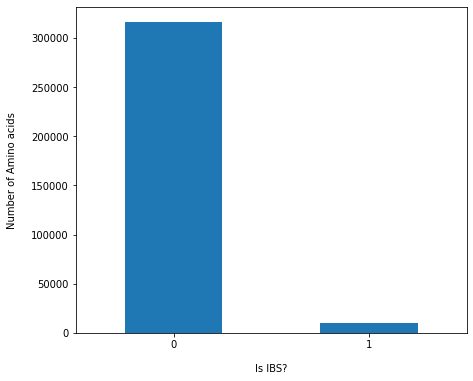

In [30]:
import matplotlib.pyplot as plt
df.is_IBS.value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Is IBS?", labelpad=14)
plt.ylabel("Number of Amino acids", labelpad=14)

In [16]:
unique_prot = df.uniprot_id.unique()

prot = []
# check that all the proteins have annoted amino acids
for id in unique_prot:
  if len(df[df.uniprot_id == id].is_IBS.unique()) == 1:
    prot.append(id)

print('Proteins without annotation %s' % len(prot))

f = open('./Datasets/My_Dataset/uniprot_proteins.json')
dict_proteins = json.load(f)
f.close()

pdbs_no_annot = []
for p in prot:
  for pdb in dict_proteins[p]:
    pdbs_no_annot.append(list(pdb.keys())[0])

print("Pdbs of uniprot %s" % len(pdbs_no_annot))

print()
common_pdbs_no_annot = list(set(dreamm_files_name) & set(pdbs_no_annot))
print(f'Common DREAMM proteins with mine and without annotation: {len(common_pdbs_no_annot)}')
print(common_pdbs_no_annot)

print()
print(prot)
# All proteins without annotation are locating in DREAMMs dataset

Proteins without annotation 33
Pdbs of uniprot 33

Common DREAMM proteins with mine and without annotation: 32
['5F0P', '1VFY', '1OIZ', '3FSN', '1C1Z', '3RZN', '1S6X', '1TQN', '3IIQ', '1JOC', '2P0M', '3W7R', '1PFO', '3AKM', '1FFJ', '1IAZ', '1COY', '3JW8', '2MH1', '1GYG', '1NL1', '5HXW', '1ES6', '1DVP', '2DDR', '2FNQ', '4X08', '5BZZ', '2AYL', '1H0A', '3NPE', '6BFG']

['P61914', 'Q15075', 'O16025', 'Q96QK1', 'Q960X8', 'P12530', 'P00735', 'P40343', 'O24592', 'P05979', 'O88339', 'P22637', 'Q28175', 'P08684', 'P0C2E9', 'Q9LCB2', 'P60484', 'P0C216', 'Q02127', 'P20932', 'P02749', 'P11889', 'Q77DJ6', 'P00803', 'Q99685', 'P49638', 'Q9NZD2', 'P00720', 'P12724', 'P12104', 'P56254', 'P60980', 'P01441']
